# Analysis of Quasi-One-Dimensional Nozzle Flow with Analytical and Numerical Methods

This notebook covers an indepth analysis of an isentropic flow through a convergin diverging nozzle for both the subsonic and the supersonic regime. The inlet of the nozzle is fed from a resivour and will have a constant pressure and temperature $(p_0, T_0)$. The flow will be subsonic in the converging portion of the nozzle, sonic at the throat (M=1) and supersonic at the exit of the nozzle. 
## Analytical Solution
This problem is solved analytically which gives us a great reference point to try out numerical methods. Let's first look at the analytical solution and then move on to numerical mehtods to solve the problem using CFD. The analytical solutions for continuity, energy and momentum are as follows. 

Continuity: $\rho_1 V_1 A_1 = \rho_2 V_2 A_2 $

Momentum: $p_1 A_1 + \rho_1 V_1^2 A_1 + \int_{A_1}^{A_2}pdA = p_2 A_2 + \rho_2 V_2^2 A_2$ 

Energy: $h_1 + \frac{v_1^2}{2} = h_2 + \frac{V_2^2}{2}$

The different subscripts denote the location of the flow inside of the nozzle. In addition to the flow equations, we also have the ideal gas equation:

$p = \rho R T$

This flow consists of a calorically perfect gas:

$h = c_p T$


The Mach number in the nozzle is determined by the area ratio $A/A^*$ where $A^*$ is the area of the nozzle at the choak point (M=1).


$\Big (\frac{A}{A^*} \Big)^2 = \frac{1}{M^2}\Big[\frac{2}{\gamma +1}\Big(1+\frac{\gamma-1}{2}M^2\Big)\Big]^{(\gamma+1)/(\gamma-1)}$

Gamma ($\gamma$) is defined as the ratio of specific heats and for air, the standard value is 1.4. 

The rest of the parameters can be solved in terms of the mach number:

$\frac{p}{p_0}  = \Big(1+\frac{\gamma-1}{2}M^2\Big)^{(-\gamma)/(\gamma-1)}$


$\frac{\rho}{\rho_0}  = \Big(1+\frac{\gamma-1}{2}M^2\Big)^{-1/(\gamma-1)}$


$\frac{T}{T_0}  = \Big(1+\frac{\gamma-1}{2}M^2\Big)^{-1}$




To view these relationships, we can plot the analytical solution.

In [2]:
import numpy                       #loading in numpy
from matplotlib import pyplot      #load matplotlib

#this makes matplotlib plots appear in the notebook (instead of a separate window)
%matplotlib inline 

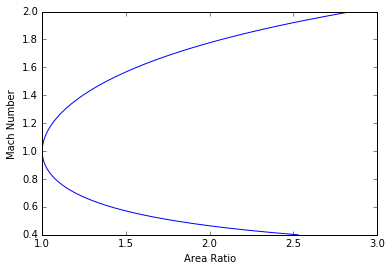

In [10]:
# Mach number vs Area Ratio
M = numpy.linspace(0.4,2,100)
aRatio = (1/M**2)* ((2/(2.4))*(1+(.4/2)*M**2))**((2.4)/(0.4))
pyplot.plot(aRatio,M)
pyplot.xlabel('Area Ratio')
pyplot.ylabel('Mach Number')

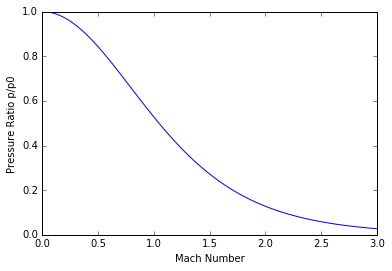

In [21]:
M = numpy.linspace(0,3,100)
# Pressure Ratio
pRatio = (1+ (0.4/2)*M**2)**(-1.4/0.4)
pyplot.plot(M,pRatio)
pyplot.xlabel('Mach Number')
pyplot.ylabel('Pressure Ratio p/p0')

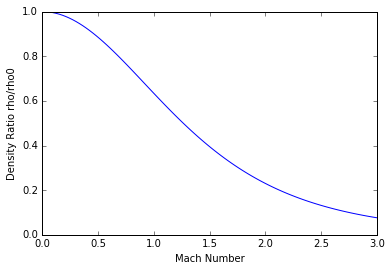

In [22]:
# Density Ratio
rhoRatio = (1+ (0.4/2)*M**2)**(-1/0.4)
pyplot.plot(M,rhoRatio)
pyplot.xlabel('Mach Number')
pyplot.ylabel('Density Ratio rho/rho0')

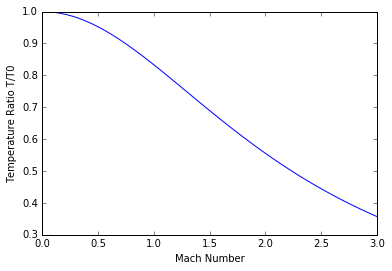

In [23]:
# Temperature Ratio
TRatio = (1+ (0.4/2)*M**2)**(-1)
pyplot.plot(M,TRatio)
pyplot.xlabel('Mach Number')
pyplot.ylabel('Temperature Ratio T/T0')

## Numerical Solution 
The first step of any numerical solution is to first write down the governing equations for the problem. In this case, we will be looking for a continuity, momentum and energy equation that will describe the flow.
### Continuity Equation
For the continuity equation, we will use the intrgral finite volume method.

$\frac{\partial}{\partial t} \iiint \limits_V \rho dV + \frac{\partial}{\partial t} \iint \limits_S \rho \textbf{V} \cdot \textbf{dS} = 0$

This equation means that the total rate of change of mass inside of the volume is equal to the amount of stuff crossing the surface of the volume. To relate the volume integral to out physical problem, we can write the following equation:


$\frac{\partial}{\partial t} \iiint \limits_V \rho dV = \frac{\partial}{\partial t} (\rho A dx)$


In this equation the value of dx*A represents an elemental volume inside of our nozzle. It is like a cross sectional area multiplied by some small length of dx. Now for the surface integral, an equation can be written as follows. 

$\frac{\partial}{\partial t} \iint \limits_S \rho \textbf{V} \cdot \textbf{dS} = -\rho V A + (\rho + d \rho)(V+ dV)(A+dA)$


Expaning this equation and combining it with the previous one, we have a form of the contiuity equation in terms of differential elements relating to our system.


$\frac{\partial (\rho A)}{\partial t} + \frac{\partial (\rho A V)}{\partial x} = 0$

### Momentum Equation
The next step in describing our system is to utilize the momentum equation. Neglecting viscous  stress terms and body forces we cna represent the momentum equation as shown below.

$\frac{\partial}{\partial t} \iiint \limits_V (\rho u) dV + \frac{\partial}{\partial t} \iint \limits_S (\rho u \textbf{V}) \cdot \textbf{dS} = \iint \limits_S (p dS)_x$

The first two terms can be transformed in a similar way as shown in the previous section but with an additional velovity component. 

$\frac{\partial}{\partial t} \iiint \limits_V (\rho u) dV = \frac{\partial}{\partial t} (\rho V A dx)$


$\frac{\partial}{\partial t} \iint \limits_S (\rho u \textbf{V}) \cdot \textbf{dS} = -\rho V^2 A + (\rho + d \rho)(V+ dV)^2(A+dA)$

The term on the right side of the equal sign represents the pressure around our element of fluid. This term can be represented with the following expression.

$\iint \limits_S (p dS)_x = -pA + (p+dp)(A+dA) - 2p\Big(\frac{dA}{2}\Big)$

Combining all of these terms we get the following equation.

$\frac{\partial (\rho V A)}{\partial t} + \frac{\partial (\rho V^2 A)}{\partial x} = -A \frac{\partial p}{\partial x}$

This is the conservation form of this equation, but we want a nonconservation form for our numerical analysis. WE can do this by multiplying the continuity equation by V resulting in the following equation. 

$V\frac{\partial (\rho A)}{\partial t} + V\frac{\partial (\rho A V)}{\partial x} = 0$

Now we can subtract this equation from the momentum equation we derived just before. With some manipulation, we are left with the final momentum equation. 

$\rho \frac{\partial V}{\partial t} + \rho u \frac{\partial u}{\partial x} = -\frac{\partial p}{\partial x}$

### Energy Equation
The integral form of the energy equation with no energy source terms is as follows.

$\frac{\partial}{\partial t} \iiint \limits_V \rho \Big(e+\frac{V^2}{2}\Big) dV + \iint \limits_S \rho\Big(e+\frac{V^2}{2}\Big)\textbf{V} \cdot \textbf{dS} = \iint \limits_S (p \textbf{V}) \cdot \textbf{dS}$

With some manipulation, we are able to transform the equation into an equation that represents our system and is in nonconservation form.  

$\rho \frac{\partial e}{\partial t} + \rho V \frac{\partial e}{\partial x} = -p\frac{\partial V}{\partial x} - pV\frac{\partial(ln A)}{\partial x}$

There is one thing left to consider, and that is the heat coefficient for the fluid. In this case, we are dealing with a calorically perfect gas. 

$e = c_v T$

Finally we have an energy equation that we can use for our numerical methods.


$\rho  c_v\frac{\partial T}{\partial t} + \rho V c_v \frac{\partial T}{\partial x} = -p\frac{\partial V}{\partial x} - pV\frac{\partial(ln A)}{\partial x}$

### Summary of Equations

As we take a moment to exampine our equations, we can see that the variables are $\rho$, V, p and T but with the use of the ideal gas equation, we can reduce the number of unknownsby one. 

$p = \rho R T$

$\frac{\partial p}{\partial x} = R \Big( \rho \frac{\partial T}{\partial x} + T \frac{\partial \rho}{\partial x}\Big )$

Now we can inplement this equation and reduce the continuity, momentum, and energy equations to only have three unknown variables. The continuity equation is simply exanded and the other two are rearranged with the new definition. 


Continuity: $\frac{\partial (\rho A)}{\partial t} + \rho A\frac{\partial V}{\partial x}+ \rho V \frac{\partial A}{\partial x}+ VA\frac{\partial \rho}{\partial x} = 0$

Momentum: $\rho \frac{\partial V}{\partial t} + \rho V \frac{\partial V}{\partial x} = -R\Big(\rho \frac{\partial T}{\partial x}+ T \frac{\partial \rho}{\partial x}\Big)$

Energy: $\rho  c_v\frac{\partial T}{\partial t} + \rho V c_v \frac{\partial T}{\partial x} = -\rho R T\Big[\frac{\partial V}{\partial x} + V\frac{\partial(ln A)}{\partial x}\Big]$


At this point, we have our flow equations and we only have a few more things to take care of befor we can start writing some programs to solve the problem. 